# What's new in Stata 17

## Jupyter Notebook with Stata

In [1]:
# https://www.stata.com/new-in-stata/jupyter-notebooks/
#!pip install stata_setup
#!pip install pyarrow

In [2]:
import time,os
import pandas as pd
import numpy as np

In [3]:
import stata_setup
stata_setup.config("C:/Program Files/Stata17", "mp")


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: 19-user 4-core network, expiring 13 May 2022
Serial number: 501709313351
  Licensed to: Miguel Portela
               Universidade do Minho

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


In [4]:
%%stata
sysuse auto, clear
save auto, replace
summarize mpg


. sysuse auto, clear
(1978 automobile data)

. save auto, replace
file auto.dta saved

. summarize mpg

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         mpg |         74     21.2973    5.785503         12         41

. 


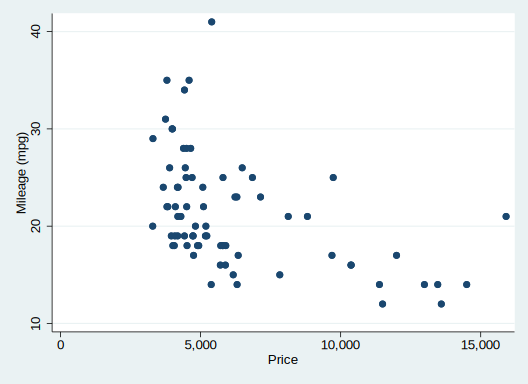

In [5]:
%stata scatter mpg price

In [6]:
import pandas as pd
import io
import requests

data = requests.get("https://www.stata.com/python/pystata/misc/nhanes2.csv").content
nhanes2 = pd.read_csv(io.StringIO(data.decode("utf-8")))
nhanes2

sampl  strata  psu region  smsa  location  houssiz     sex   race  age  \
0       1400       1    1      S     2         1        4    Male  White   54   
1       1401       1    1      S     2         1        6  Female  White   41   
2       1402       1    1      S     1         1        6  Female  Other   21   
3       1404       1    1      S     2         1        9  Female  White   63   
4       1405       1    1      S     1         1        3  Female  White   64   
...      ...     ...  ...    ...   ...       ...      ...     ...    ...  ...   
10346  48760      32    2     MW     4        48        5  Female  White   35   
10347  48763      32    2     MW     4        48        2  Female  White   33   
10348  48764      32    2     MW     4        48        1  Female  White   60   
10349  48768      32    2     MW     4        48        1  Female  White   29   
10350  48770      32    2     MW     4        48        1    Male  White   31   

       ...  region4  smsa1  smsa2  smsa3  rural   loglead  agegrp  highlead  \
0      ...        0      0      1      0      0       NaN   50-59       NaN   
1      ...        0      0      1      0      0  2.564949   40-49   lead<25   
2      ...        0      1      0      0      0       NaN   20-29       NaN   
3      ...        0      0      1      0      0       NaN   60-69       NaN   
4      ...        0      1      0      0      0  2.995732   60-69   lead<25   
...    ...      ...    ...    ...    ...    ...       ...     ...       ...   
10346  ...        0      0      0      1      1       NaN   30-39       NaN   
10347  ...        0      0      0      1      1  1.945910   30-39   lead<25   
10348  ...        0      0      0      1      0       NaN   60-69       NaN   
10349  ...        0      0      0      1      0       NaN   20-29       NaN   
10350  ...        0      0      0      1      1       NaN   30-39       NaN   

             bmi  highbp  
0      20.495686       0  
1      21.022337       0  
2      24.973860       0  
3      35.728722       1  
4      27.923803       0  
...          ...     ...  
10346  20.355173       0  
10347  41.645557       1  
10348  35.626114       0  
10349  19.204464       0  
10350  19.635565       0  

[10351 rows x 58 columns]

In [7]:
%%stata -d nhanes2 -eret myeret
logistic highbp c.age##c.weight
ereturn list


. logistic highbp c.age##c.weight

Logistic regression                                    Number of obs =  10,351
                                                       LR chi2(3)    = 2381.23
                                                       Prob > chi2   =  0.0000
Log likelihood = -5860.1512                            Pseudo R2     =  0.1689

------------------------------------------------------------------------------
      highbp | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.108531   .0080697    14.15   0.000     1.092827     1.12446
      weight |   1.081505    .005516    15.36   0.000     1.070748    1.092371
             |
       c.age#|
    c.weight |   .9992788   .0000977    -7.38   0.000     .9990873    .9994703
             |
       _cons |   .0002025   .0000787   -21.89   0.000     .0000946    .0004335
-------------------------------------------------

In [8]:
myeret ['e(b)'], myeret['e(V)'] 

(array([[ 1.03035513e-01,  7.83537342e-02, -7.21492384e-04,
         -8.50485078e+00]]),
 array([[ 5.29930771e-05,  3.50509317e-05, -6.97861002e-07,
         -2.69423163e-03],
        [ 3.50509317e-05,  2.60132664e-05, -4.74084051e-07,
         -1.94299575e-03],
        [-6.97861002e-07, -4.74084051e-07,  9.55811835e-09,
          3.50377699e-05],
        [-2.69423163e-03, -1.94299575e-03,  3.50377699e-05,
          1.50887842e-01]]))


. quietly margins, at(age=(20(10)80))

. marginsplot

Variables that uniquely identify margins: age

. 


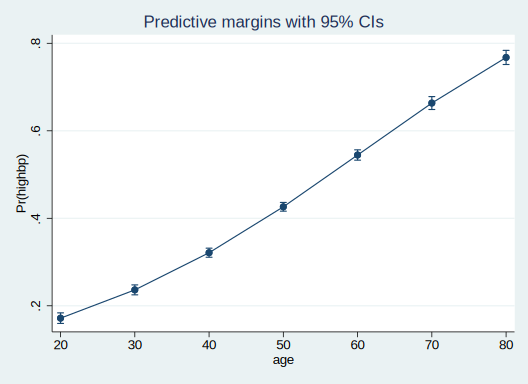

In [9]:
%%stata
quietly margins, at(age=(20(10)80))
marginsplot

In [10]:
%%stata -doutd preddata
quietly margins, at(age=(20(5)80) weight=(40(5)180)) saving(predictions, replace)

use predictions, clear
list _at1 _at2 _margin in 1/5
rename _at1 age
rename _at2 weight
rename _margin pr_highbp


. quietly margins, at(age=(20(5)80) weight=(40(5)180)) saving(predictions, repl
> ace)

. 
. use predictions, clear
(Created by command margins; also see char list)

. list _at1 _at2 _margin in 1/5

     +------------------------+
     | _at1   _at2    _margin |
     |------------------------|
  1. |   20     40   .0200911 |
  2. |   20     45   .0274497 |
  3. |   20     50   .0374008 |
  4. |   20     55   .0507709 |
  5. |   20     60   .0685801 |
     +------------------------+

. rename _at1 age

. rename _at2 weight

. rename _margin pr_highbp

. 


In [11]:
preddata[['age', 'weight', 'pr_highbp']].head() 

age  weight  pr_highbp
0   20      40   0.020091
1   20      45   0.027450
2   20      50   0.037401
3   20      55   0.050771
4   20      60   0.068580

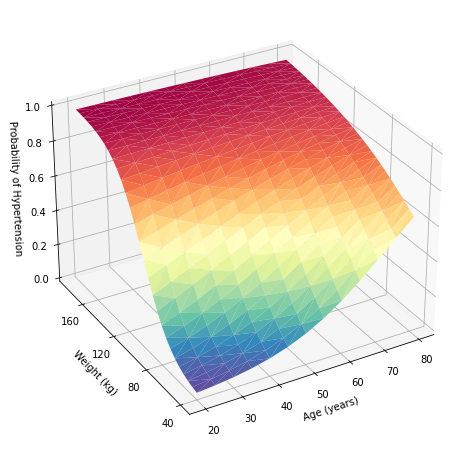

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# define the axes
fig = plt.figure(1, figsize=(10, 8))
ax = plt.axes(projection='3d')

# plot
ax.plot_trisurf(preddata['age'], preddata['weight'], preddata['pr_highbp'],cmap=plt.cm.Spectral_r)

# set ticks and labels for x, y, and z axes
ax.set_xticks(np.arange(20, 90, step=10))
ax.set_yticks(np.arange(40, 200, step=40))
ax.set_zticks(np.arange( 0, 1.2, step=0.2))
ax.set_xlabel("Age (years)")
ax.set_ylabel("Weight (kg)")
ax.set_zlabel("Probability of Hypertension")

# adjust the view angle
ax.view_init(elev=30, azim=240)

# show the plot
plt.show()

In [13]:
from pystata import stata

stata.pdataframe_to_data(nhanes2, force=True)
stata.run('logistic highbp c.age##c.weight')


Logistic regression                                    Number of obs =  10,351
                                                       LR chi2(3)    = 2381.23
                                                       Prob > chi2   =  0.0000
Log likelihood = -5860.1512                            Pseudo R2     =  0.1689

------------------------------------------------------------------------------
      highbp | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.108531   .0080697    14.15   0.000     1.092827     1.12446
      weight |   1.081505    .005516    15.36   0.000     1.070748    1.092371
             |
       c.age#|
    c.weight |   .9992788   .0000977    -7.38   0.000     .9990873    .9994703
             |
       _cons |   .0002025   .0000787   -21.89   0.000     .0000946    .0004335
------------------------------------------------------------------------------
Note:

In [14]:
myeret2 = stata.get_ereturn()
myeret2['e(b)'], myeret2['e(V)']

(array([[ 1.03035513e-01,  7.83537342e-02, -7.21492384e-04,
         -8.50485078e+00]]),
 array([[ 5.29930771e-05,  3.50509317e-05, -6.97861002e-07,
         -2.69423163e-03],
        [ 3.50509317e-05,  2.60132664e-05, -4.74084051e-07,
         -1.94299575e-03],
        [-6.97861002e-07, -4.74084051e-07,  9.55811835e-09,
          3.50377699e-05],
        [-2.69423163e-03, -1.94299575e-03,  3.50377699e-05,
          1.50887842e-01]]))

In [15]:
stata.run('''
quietly margins, at(age=(20(5)80) weight=(40(5)180)) ///
    saving(predictions, replace)

use predictions, clear
list _at1 _at2 _margin in 1/5
rename _at1 age
rename _at2 weight
rename _margin pr_highbp
''') 


. 
. quietly margins, at(age=(20(5)80) weight=(40(5)180)) ///
>     saving(predictions, replace)

. 
. use predictions, clear
(Created by command margins; also see char list)

. list _at1 _at2 _margin in 1/5

     +------------------------+
     | _at1   _at2    _margin |
     |------------------------|
  1. |   20     40   .0200911 |
  2. |   20     45   .0274497 |
  3. |   20     50   .0374008 |
  4. |   20     55   .0507709 |
  5. |   20     60   .0685801 |
     +------------------------+

. rename _at1 age

. rename _at2 weight

. rename _margin pr_highbp

. 


In [16]:
preddata2 = stata.pdataframe_from_data(var="age weight pr_highbp")
preddata2.head()

age  weight  pr_highbp
0   20      40   0.020091
1   20      45   0.027450
2   20      50   0.037401
3   20      55   0.050771
4   20      60   0.068580

## PyStata—Python and Stata

In [17]:
# Setup Stata
import stata_setup
stata_setup.config("C:/Program Files/Stata17", "se")

In [18]:
# Import json data
from pandas.io.json import json_normalize
import json
with open("did.json") as json_file:
    data = json.load(json_file)
data = json_normalize(data, 'records', ['hospital_id', 'month'])

<ipython-input-18-8f88cc91b84a>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = json_normalize(data, 'records', ['hospital_id', 'month'])


In [19]:
# Load data to Stata
from pystata import stata
stata.pdataframe_to_data(data, True)

In [20]:
# Run block of Stata code 
stata.run('''
destring satisfaction_score, replace
destring hospital_id, replace
destring month, replace

gen proc = 0
replace proc = 1 if procedure == "New"
label define procedure 0 "Old" 1 "New"
drop procedure
rename proc procedure
label value procedure procedure
''', quietly=True)

stata.run('''
didregress (satisfaction_score) (procedure), group(hospital_id) time(month)
''', echo=True)



. 
. didregress (satisfaction_score) (procedure), group(hospital_id) time(month)

Number of groups and treatment time

Time variable: month
Control:       procedure = 0
Treatment:     procedure = 1
-----------------------------------
             |   Control  Treatment
-------------+---------------------
Group        |
 hospital_id |        28         18
-------------+---------------------
Time         |
     Minimum |         1          4
     Maximum |         1          4
-----------------------------------

Difference-in-differences regression                     Number of obs = 7,368
Data type: Repeated cross-sectional

                           (Std. err. adjusted for 46 clusters in hospital_id)
------------------------------------------------------------------------------
             |               Robust
satisfacti~e | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
ATET         

In [21]:
# Load Stata results to Python
r = stata.get_return()['r(table)']

In [22]:
# Use Stata results in Python
print("The treatment hospitals had a %4.2f-point increase." 
      % (r[0][0]), end=" ") 
print("The result is with 95%% confidence interval [%4.2f, %4.2f]." 
      % (r[4][0], r[5][0]))

The treatment hospitals had a 0.85-point increase. The result is with 95% confidence interval [0.78, 0.91].


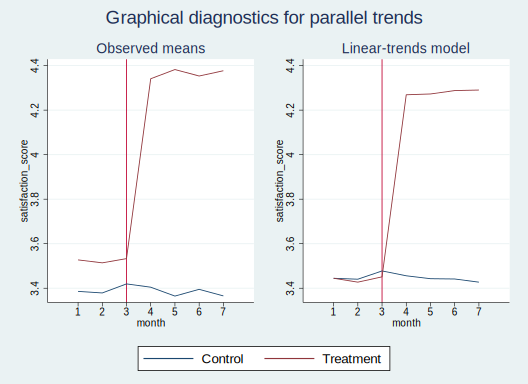

In [23]:
# Generate Stata graph 
stata.run("estat trendplots", quietly=True)
stata.run("graph export did.svg, replace", quietly=True)

## PyArrow

In [24]:
import pyarrow.feather as feather
df = pd.read_stata('auto.dta')

In [25]:
feather.write_feather(df, 'auto.feather',version=2)

In [26]:
# Result is pandas.DataFrame
read_df = feather.read_feather('auto.feather')

# Result is pyarrow.Table
read_arrow = feather.read_table('auto.feather')

In [29]:
from sfi import Frame
stata: sysuse "auto.dta", clear
d = Frame.connect('default')
f = d.clone('myauto')
Frame.getFrameCount()
Frame.getFrameAt(0)

SyntaxError: invalid syntax (<ipython-input-29-33efe4337ff6>, line 2)

### https://www.stata.com/python/api17/index.html

In [40]:
%%stata
sysuse auto, clear
python
from sfi import Data
dataraw = Data.get('foreign')
dataraw
end

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]


. sysuse auto, clear
(1978 automobile data)

. python
----------------------------------------------- python (type end to exit) -----
>>> from sfi import Data
>>> dataraw = Data.get('foreign')
>>> dataraw
>>> end
-------------------------------------------------------------------------------

. 


In [42]:
%%stata
frames reset
frame create ds
python
import pandas as pd
import sfi as sfi
from sfi import Frame, Data
from pandas import Series, DataFrame
data = {'school': ['UCSC', 'UCLA', 'UCD', 'UCSB', 'UCI', 'UCSF'],'year': [2000, 2001, 2002, 2001, 2002, 2003], 'num': [4000, 3987, 5000, 4321, 5000, 8200]}

ds = pd.DataFrame(data)
f = Frame.connect("ds")
f.setObsTotal(len(ds))
f.addVarStr('school', 1)
f.addVarDouble('year')
f.addVarDouble('num')
f.store(None, None, ds.values.tolist())
end
frame ds : list


. frames reset

. frame create ds

. python
----------------------------------------------- python (type end to exit) -----
>>> import pandas as pd
>>> import sfi as sfi
>>> from sfi import Frame, Data
>>> from pandas import Series, DataFrame
>>> data = {'school': ['UCSC', 'UCLA', 'UCD', 'UCSB', 'UCI', 'UCSF'],'year': [2
> 000, 2001, 2002, 2001, 2002, 2003], 'num': [4000, 3987, 5000, 4321, 5000, 820
> 0]}
>>> 
>>> ds = pd.DataFrame(data)
>>> f = Frame.connect("ds")
>>> f.setObsTotal(len(ds))
>>> f.addVarStr('school', 1)
>>> f.addVarDouble('year')
>>> f.addVarDouble('num')
>>> f.store(None, None, ds.values.tolist())
>>> end
-------------------------------------------------------------------------------

. frame ds : list

     +----------------------+
     | school   year    num |
     |----------------------|
  1. |   UCSC   2000   4000 |
  2. |   UCLA   2001   3987 |
  3. |    UCD   2002   5000 |
  4. |   UCSB   2001   4321 |
  5. |    UCI   2002   5000 |
     |----------------------

In [46]:
%%stata

frames reset
frame create ds
python
import pandas as pd
import pyarrow.feather as feather
read_df = feather.read_feather('auto.feather')
ds = pd.DataFrame(read_df)
f = Frame.connect("ds")
f.setObsTotal(len(ds))
f.addVarStr('make', 1)
f.addVarDouble('price')
f.addVarDouble('mpg')
f.store(None, None, ds.values.tolist())
end
frame ds : list


. 
. frames reset

. frame create ds

. python
----------------------------------------------- python (type end to exit) -----
>>> import pandas as pd
>>> import pyarrow.feather as feather
>>> read_df = feather.read_feather('auto.feather')
>>> ds = pd.DataFrame(read_df)
>>> f = Frame.connect("ds")
>>> f.setObsTotal(len(ds))
>>> f.addVarStr('make', 1)
>>> f.addVarDouble('price')
>>> f.addVarDouble('mpg')
>>> f.store(None, None, ds.values.tolist())


ValueError: inner dimensions do not match number of variables

r(7102);
>>> end
-------------------------------------------------------------------------------

. frame ds : list

     +--------------------+
     | make   price   mpg |
     |--------------------|
  1. |            .     . |
  2. |            .     . |
  3. |            .     . |
  4. |            .     . |
  5. |            .     . |
     |--------------------|
  6. |            .     . |
  7. |            .     . |
  8. |            .     . |
  9. |            .     . |
 10. |            .     . |
     |--------------------|
 11. |            .     . |
 12. |            .     . |
 13. |            .     . |
 14. |            .     . |
 15. |            .     . |
     |--------------------|
 16. |            .     . |
 17. |            .     . |
 18. |            .     . |
 19. |            .     . |
 20. |            .     . |
     |--------------------|
 21. |            .     . |
 22. |            .     . |
 23. |            .     . |
 24. |            .     . |
 25. |         

In [34]:
%%stata
frame ds: sum